In [31]:
!pip install spacy --user
!python3 -m spacy download it_core_news_sm
!pip3 install -U spacy
!pip3 install spacy
!python -m spacy download it_core_news_sm

     |████████████████████████████████| 21.4 MB 48 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/it_core_news_sm-3.2.0/it_core_news_sm-3.2.0-py3-none-any.whl (21.4 MB)
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [32]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import pandas as pd

In [33]:
df= pd.read_csv('Books.csv')
df

,Unnamed: 0,_id,author,contents,publishing house,year
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904


In [34]:
import nltk
nltk.download('punkt')
df['Frasi']= df.apply(lambda row: nltk.sent_tokenize(row['contents']), axis=1)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,_id,author,contents,publishing house,year,Frasi
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014,[Quel giorno era impossibile uscire a passeggi...
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904,"[In quel giorno era impossibile passeggiare., ..."


In [35]:
Frasi = list(df['Frasi'][0])
Frasi2 = list(df['Frasi'][1])
import numpy as np
Frasi_Feltrinelli = pd.DataFrame(Frasi, columns={'Frasi'})
Frasi_Treves = pd.DataFrame(Frasi2, columns={'Frasi'})

In [36]:
Frasi_Feltrinelli.to_csv('Frasi_Feltrinelli.csv', encoding="utf-8")
Frasi_Treves.to_csv('Frasi_Treves.csv', encoding="utf-8")

In [37]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(df['contents'], n_process=2, batch_size=2000)

In [39]:
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [40]:
data = df

In [41]:
data['spacy_doc'] = docs

In [42]:
data['POS_spacy'] = data['spacy_doc'].progress_apply(lambda x: [(y.text, y.pos_) for y in x])
data['lemmatized'] = data['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x if len(x)>1]))
data['tokens'] = data['spacy_doc'].progress_apply(lambda x: [y.text for y in x])
data['language'] = data['spacy_doc'].progress_apply(lambda x: set([y.lang_ for y in x]))
data['language'] = data['language'].progress_apply(lambda x: list(x)[0])

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
def filter_text_pos(x):
    final_pos_text = []
    for elem in x:
        for pos in pos_list:
            if elem[1] == pos:
                final_pos_text.append(elem[0])
    
    return " ".join(final_pos_text)

In [44]:
pos_list = ["NOUN"]
data["NOUN"] = data.apply(lambda x: filter_text_pos(x["POS_spacy"]), axis=1)
data['NOUN_count'] = data['NOUN'].apply(lambda x: len(x.split()))

In [45]:
from spacy.lang.it.stop_words import STOP_WORDS
import string
def clean(x):
  stop = STOP_WORDS
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop and w not in string.punctuation]
  return " ".join(words)

In [46]:
data['clean']= data['NOUN'].apply(clean)

In [47]:
data['clean']= data.apply(lambda row: nltk.word_tokenize(row['clean']), axis=1)

In [48]:
data

,Unnamed: 0,_id,author,contents,publishing house,year,Frasi,spacy_doc,POS_spacy,lemmatized,tokens,language,NOUN,NOUN_count,clean
0,0,Jane Eyre_Feltrinelli_pulito.txt,Charlotte Brontë,Quel giorno era impossibile uscire a passeggio...,Feltrinelli Editore,2014,[Quel giorno era impossibile uscire a passeggi...,"(Quel, giorno, era, impossibile, uscire, a, pa...","[(Quel, DET), (giorno, NOUN), (era, AUX), (imp...",quello giorno essere impossibile uscire a pass...,"[Quel, giorno, era, impossibile, uscire, a, pa...",it,giorno passeggio mattino realtà ora arbusti pr...,34042,"[passeggio, mattino, realtà, arbusti, pranzo, ..."
1,1,Jane Eyre_Treves_pulito.txt,Charlotte Brontë,In quel giorno era impossibile passeggiare. La...,Fratelli Treves Editori,1904,"[In quel giorno era impossibile passeggiare., ...","(In, quel, giorno, era, impossibile, passeggia...","[(In, ADP), (quel, DET), (giorno, NOUN), (era,...",in quello giorno essere impossibile passeggiar...,"[In, quel, giorno, era, impossibile, passeggia...",it,giorno mattina ora boschetto foglie pranzo sig...,28659,"[mattina, boschetto, foglie, pranzo, signora, ..."


In [49]:
data['clean']= data.apply(lambda row: nltk.word_tokenize(row['NOUN']), axis=1)

In [50]:
data['clean']

0    [giorno, passeggio, mattino, realtà, ora, arbu...
1    [giorno, mattina, ora, boschetto, foglie, pran...
Name: clean, dtype: object

In [51]:
word_list = nltk.word_tokenize(str(data['NOUN'][0]))
word_list2 = nltk.word_tokenize(str(data['NOUN'][1]))
import numpy as np
noun1 = pd.DataFrame(word_list, columns={'text'})
noun2 = pd.DataFrame(word_list2, columns={'text'})

In [52]:
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(noun1['text'], n_process=2, batch_size=2000)

In [53]:
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [54]:
noun1['spacy_doc'] = docs

In [55]:
noun1['lemmatized'] = noun1['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x ]))

  0%|          | 0/34107 [00:00<?, ?it/s]

In [56]:
noun1

,text,spacy_doc,lemmatized
0,giorno,(giorno),giorno
1,passeggio,(passeggio),passeggio
2,mattino,(mattino),mattino
3,realtà,(realtà),realtà
4,ora,(ora),ora
...,...,...,...
34102,giorno,(giorno),giorno
34103,chiarezza,(chiarezza),chiarezza
34104,ora,(ora),ora
34105,ora,(ora),ora


In [57]:
noun1["Lemmi"] = noun1["lemmatized"].apply(clean)

In [58]:
noun1

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,
1,passeggio,(passeggio),passeggio,passeggio
2,mattino,(mattino),mattino,mattino
3,realtà,(realtà),realtà,realtà
4,ora,(ora),ora,
...,...,...,...,...
34102,giorno,(giorno),giorno,
34103,chiarezza,(chiarezza),chiarezza,chiarezza
34104,ora,(ora),ora,
34105,ora,(ora),ora,


In [59]:
result_df = noun1.drop_duplicates(subset=['Lemmi'])

In [60]:
result_df

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,
1,passeggio,(passeggio),passeggio,passeggio
2,mattino,(mattino),mattino,mattino
3,realtà,(realtà),realtà,realtà
5,arbusti,(arbusti),arbusto,arbusto
...,...,...,...,...
34049,convoglio,(convoglio),convoglio,convoglio
34056,rinneghi,(rinneghi),rinneghi,rinneghi
34060,dominatore,(dominatore),dominatore,dominatore
34066,supreme,(supreme),supremo,supremo


In [61]:
result_df['Lemmi']

0                  
1         passeggio
2           mattino
3            realtà
5           arbusto
            ...    
34049     convoglio
34056      rinneghi
34060    dominatore
34066       supremo
34101         pegno
Name: Lemmi, Length: 5423, dtype: object

In [62]:
lemmi = result_df['Lemmi']
lemmi.to_csv('Feltrinelli_Lemmi.csv', encoding="utf-8")

In [63]:
import spacy
from spacy.lang.it.examples import sentences 
from tqdm.notebook import tqdm
tqdm.pandas()
nlp = spacy.load('it_core_news_sm')
nlp.max_length = 1064150 
pipe = nlp.pipe(noun2['text'], n_process=2, batch_size=2000)
docs = [x for x in tqdm(pipe)]

0it [00:00, ?it/s]

In [64]:
noun2['spacy_doc'] = docs
noun2['lemmatized'] = noun2['spacy_doc'].progress_apply(lambda x: " ".join([y.lemma_ for y in x ]))

  0%|          | 0/28689 [00:00<?, ?it/s]

In [65]:
noun2["Lemmi"] = noun2["lemmatized"].apply(clean)

In [66]:
noun2

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,
1,mattina,(mattina),mattina,mattina
2,ora,(ora),ora,
3,boschetto,(boschetto),boschetto,boschetto
4,foglie,(foglie),foglia,foglia
...,...,...,...,...
28684,giorno,(giorno),giorno,
28685,liberazione,(liberazione),liberazione,liberazione
28686,ora,(ora),ora,
28687,ardore,(ardore),ardore,ardore


In [67]:
result_df2 = noun2.drop_duplicates(subset=['Lemmi'])

In [68]:
result_df2

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,
1,mattina,(mattina),mattina,mattina
3,boschetto,(boschetto),boschetto,boschetto
4,foglie,(foglie),foglia,foglia
5,pranzo,(pranzo),pranzo,pranzo
...,...,...,...,...
28616,marina,(marina),marinare,marinare
28632,redenzione,(redenzione),redenzione,redenzione
28642,austerità,(austerità),austerità,austerità
28643,guerriero,(guerriero),guerriero,guerriero


In [69]:
noun2

,text,spacy_doc,lemmatized,Lemmi
0,giorno,(giorno),giorno,
1,mattina,(mattina),mattina,mattina
2,ora,(ora),ora,
3,boschetto,(boschetto),boschetto,boschetto
4,foglie,(foglie),foglia,foglia
...,...,...,...,...
28684,giorno,(giorno),giorno,
28685,liberazione,(liberazione),liberazione,liberazione
28686,ora,(ora),ora,
28687,ardore,(ardore),ardore,ardore


In [70]:
lemmi2 = result_df2['Lemmi']
lemmi2.to_csv('Treves_Lemmi.csv', encoding="utf-8")

In [71]:
common = list(set(lemmi.values).intersection(set(lemmi2.values)))

In [72]:
uncommon=list(set(lemmi.values).symmetric_difference(set(lemmi2.values)))

In [75]:
!pip install dataframe_image

     |████████████████████████████████| 1.1 MB 12.4 MB/s 
     |████████████████████████████████| 192 kB 71.2 MB/s 
     |████████████████████████████████| 160 kB 50.6 MB/s 
     |████████████████████████████████| 271 kB 55.2 MB/s 


In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from wordcloud import WordCloud
from PIL import Image
from os import path, getcwd
import dataframe_image as dfi

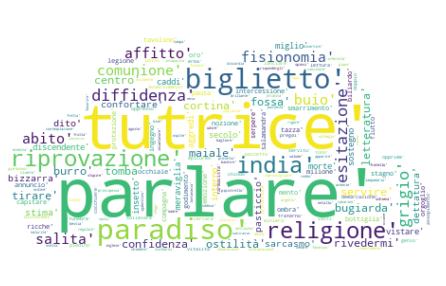

In [77]:
path_cloud = "aa.png"
cloud = np.array(Image.open(path_cloud))
Common_Lemmi = WordCloud(background_color="white", mask=cloud).generate(str(common))
plt.figure(figsize=(8,5))
plt.imshow(Common_Lemmi, interpolation="bilinear")
plt.axis("off")
Common_Lemmi.to_file("images_d\Common_Lemmi.png")
plt.show()

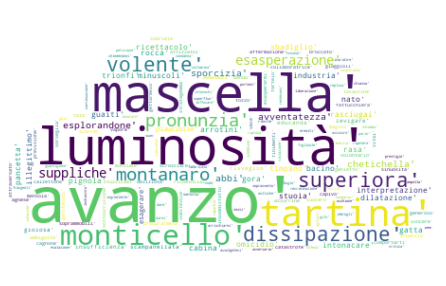

In [78]:
path_cloud = "aa.png"
cloud = np.array(Image.open(path_cloud))
Uncommon_Lemmi = WordCloud(background_color="white", mask=cloud).generate(str(uncommon))
plt.figure(figsize=(8,5))
plt.imshow(Uncommon_Lemmi, interpolation="bilinear")
plt.axis("off")
#Uncommon_Lemmi.to_file("images_d\Uncommon_Lemmi.png")
plt.show()

In [79]:
Common_noun = pd.DataFrame(common, columns={'Common'})
Common_noun

,Common
0,
1,parlare
2,tutrice
3,paradiso
4,biglietto
...,...
2768,innamorato
2769,aspettarmi
2770,intemperie
2771,irritazione


In [80]:
Uncommon_noun = pd.DataFrame(uncommon, columns={'Uncommon'})
Uncommon_noun

,Uncommon
0,avanzo
1,luminosità
2,mascella
3,tartina
4,monticello
...,...
4079,tendaggio
4080,delirare
4081,scodella
4082,eccentricità
